# Estudo do Mercado Financeiro (Bancos) - Este notebook utiliza a biblioteca yfinance e outras para analista algumas ações da bolsa de valores

### Site:       https://filipedeabreu.com

### Autor:      Filipe de Abreu

### Manutenção:  Filipe de Abreu

<hr>

# Testado em
### OS: Windows 11                                      
### Versão do python: 3.12.7    

## OBS: Se tratando de dados da bolsa de valores, os valores extraidos podem variar dependendo da data em que forem consultados

## Etapa de Datawrangling, ou seja, preparação da base de dados para extração de informação

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [174]:
#Função que retorna informações de um papel com base no input de um usuário
def cria_dataframe(acao, periodo):
    acao_santander =  yf.Ticker(acao)
    data = acao_santander.history(period=periodo)
    return data

### Consultando a ação do <font color='red'> Santander </font> ('SANB11.SA') no período de 1 ano ('1y')

In [176]:
df_santander = cria_dataframe('SANB11.SA','1y') #Selecionado a ação do santander, no periodo de 1 ano
df_santander.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-22 00:00:00-03:00,29.219,29.588,29.087,29.314,1693400,0.000,0.000
2023-11-23 00:00:00-03:00,29.314,29.569,29.125,29.257,707100,0.000,0.000
2023-11-24 00:00:00-03:00,29.210,29.210,28.870,29.021,897100,0.000,0.000
2023-11-27 00:00:00-03:00,29.059,29.248,28.709,28.926,1420200,0.000,0.000
2023-11-28 00:00:00-03:00,28.832,29.210,28.690,28.879,1931800,0.000,0.000
2023-11-29 00:00:00-03:00,28.879,29.210,28.756,29.021,1349400,0.000,0.000
2023-11-30 00:00:00-03:00,29.021,29.531,28.964,29.305,2567800,0.000,0.000
2023-12-01 00:00:00-03:00,29.305,29.305,29.305,29.305,0,0.000,0.000
2023-12-04 00:00:00-03:00,28.926,29.446,28.860,29.267,1727300,0.000,0.000


In [177]:
df_santander[['Dividends', 'Stock Splits']].head(30)

,Dividends,Stock Splits
Date,,
2023-11-22 00:00:00-03:00,0.000,0.000
2023-11-23 00:00:00-03:00,0.000,0.000
2023-11-24 00:00:00-03:00,0.000,0.000
2023-11-27 00:00:00-03:00,0.000,0.000
2023-11-28 00:00:00-03:00,0.000,0.000
2023-11-29 00:00:00-03:00,0.000,0.000
2023-11-30 00:00:00-03:00,0.000,0.000
2023-12-01 00:00:00-03:00,0.000,0.000
2023-12-04 00:00:00-03:00,0.000,0.000


In [178]:
df_santander['Stock Splits'][ df_santander['Stock Splits'] != 0]

Series([], Name: Stock Splits, dtype: float64)

In [179]:
df_santander['Dividends'][ df_santander['Dividends'] != 0]

Date
2024-01-22 00:00:00-03:00   0.403
2024-04-22 00:00:00-03:00   0.402
2024-07-22 00:00:00-03:00   0.403
2024-10-18 00:00:00-03:00   0.402
Name: Dividends, dtype: float64

### Primeiras impressoes

O dataframe apresenta váriaveis quantitativas continuas e não há variaveis categóricas, o index poderia talvez ser reduzido, deixando apenas a data e tirando a hora, já que não pretendo analisar de forma precisa o horário de abertura ou fechamento das ações. Se trata de dados populacionas, portanto, para qualquer analise estatisca, deve se ter em mente que sao dados populacionas, e nao de uma amsotra.

As variaveis 'Dividends' e 'Stock Splits' já de ínicio, apresentaram muitos valores iguais a 0, analisando essa variaveis separadamente, observei que apenas a variavel 'Dividends' possui valores diferentes de zero, porém em apenas 4 observações, portanto, irei remover essas variáveis  do dataframe

In [181]:
df_santander.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

### Extraindo algumas informações básicas do dataset

In [183]:
df_santander.info() #tipos de dados
#Não há campos NaN para serem tratados

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-11-22 00:00:00-03:00 to 2024-11-22 00:00:00-03:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    253 non-null    float64
 1   High    253 non-null    float64
 2   Low     253 non-null    float64
 3   Close   253 non-null    float64
 4   Volume  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


In [184]:
print(f'Numero de observações: {df_santander.shape[0]} \nNúmero de variáveis: {df_santander.shape[1]}')  #formato

Numero de observações: 253 
Número de variáveis: 5


## Etapa de estatistica descritiva

In [186]:
df_santander_descritivo = df_santander.describe()

#Renomeando o index
df_santander_descritivo.index = ['Contagem','Média','Desvio Padrão', 'Mínimo', '1° Quartil', '2° Quartil', '3° Quartil', 'Máximo']

#Defining o numero de casas decimais para 3
pd.set_option('float.format','{:.3f}'.format)

#Printando o novo data set
df_santander_descritivo

,Open,High,Low,Close,Volume
Contagem,253.000,253.000,253.000,253.000,253.000
Média,28.059,28.322,27.794,28.049,2714997.233
Desvio Padrão,1.370,1.389,1.377,1.382,4537780.187
Mínimo,25.360,25.380,24.960,25.320,0.000
1° Quartil,27.044,27.290,26.798,27.056,1470600.000
2° Quartil,27.851,28.216,27.622,27.909,1989100.000
3° Quartil,28.920,29.210,28.638,28.841,3208700.000
Máximo,31.199,31.534,31.071,31.327,71189700.000


In [187]:
#Utilizando medidadas de dispersao, coeficiente de variancia


#Calculando coeficiente de variação para as variaveis Open, High, Low e Close

coeficientes_de_variacao = []
for i in range (0,5):
    coeficientes_de_variacao.append((df_santander_descritivo.iloc[2, i] / df_santander_descritivo.iloc[1, i]) * 100)

#Adcionando a porcentagem, tendo em vista que o coeficiente da variação é obsavardo em porcentagem
coeficientes_com_porcentagem = [f"{coeficientes_de_variacao:.3f}%" for coeficientes_de_variacao in coeficientes_de_variacao]

#CV = Coeficiente de variação
pd.Series(coeficientes_com_porcentagem, index=['CV_Open:','CV_High:','CV_Low:','CV_Close:', 'CV_Volume:'])

CV_Open:        4.884%
CV_High:        4.904%
CV_Low:         4.954%
CV_Close:       4.926%
CV_Volume:    167.138%
dtype: object

In [188]:
variancias = []

for i in range(0,5):
    variancias.append(df_santander.iloc[:, i].var())

variancias

[1.8781607244699066,
 1.9288363174120413,
 1.896094790718657,
 1.9093975874698845,
 20591449026539.926]

In [189]:
#Adcionando os coeficientes de variação ao datagFrame
df_santander_descritivo.loc['Coeficiente de Variação'] = coeficientes_com_porcentagem

#Adcionando as variancias o ao datagFrame
df_santander_descritivo.loc['Variancia'] = variancias

df_santander_descritivo

,Open,High,Low,Close,Volume
Contagem,253.000,253.000,253.000,253.000,253.000
Média,28.059,28.322,27.794,28.049,2714997.233
Desvio Padrão,1.370,1.389,1.377,1.382,4537780.187
Mínimo,25.360,25.380,24.960,25.320,0.000
1° Quartil,27.044,27.290,26.798,27.056,1470600.000
2° Quartil,27.851,28.216,27.622,27.909,1989100.000
3° Quartil,28.920,29.210,28.638,28.841,3208700.000
Máximo,31.199,31.534,31.071,31.327,71189700.000
Coeficiente de Variação,4.884%,4.904%,4.954%,4.926%,167.138%
Variancia,1.878,1.929,1.896,1.909,20591449026539.926


### O que se pode observar das estatiscas acima?

Em média, o valor de abertura da ação não é muito diferente do valor de fechamento. Tirando a variavel "Volume", o coeficiente de variação foi menor que 10% para todas as variaveis que os dados são significativamente homogêneos, ou seja, não são muitos dispersos

### Algumas informações gráficas simples

In [192]:
df_santander['Close'].max()

31.327402114868164

Text(2024-10-03 00:00:00-03:00, 28.148667266906017, 'Média')

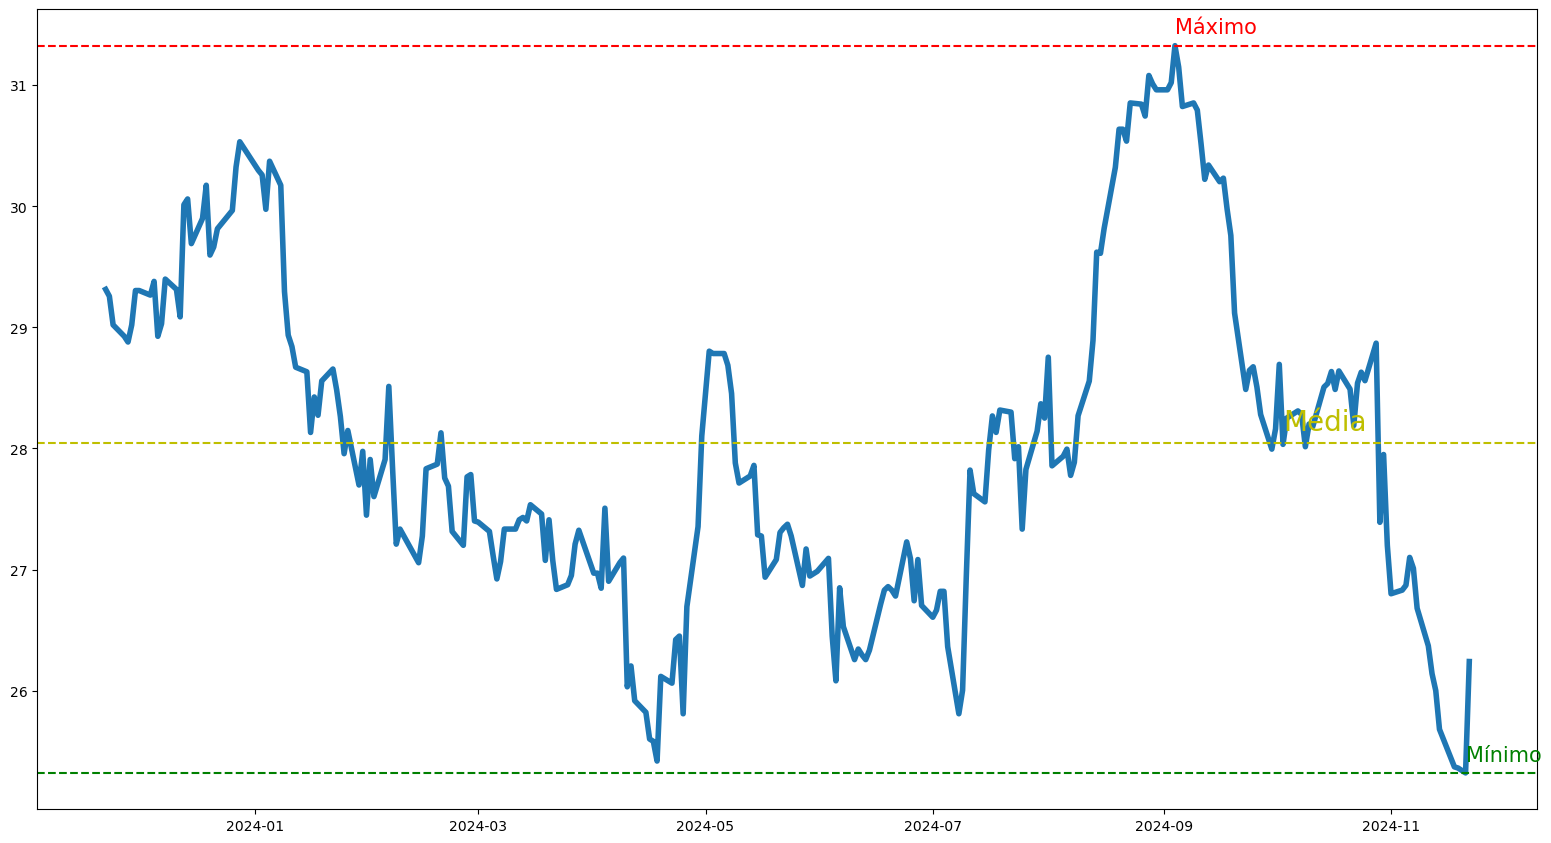

In [193]:
#Analisando apenas a variable "Close"

#Plotando um graáfico de linha
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df_santander.index, df_santander['Close'], linewidth=4)

#Traçando uma linha rente ao valor maximo ja atingido lo papel
ax.axhline(df_santander['Close'].max(), c= 'r', ls = '--')
ax.annotate("Máximo", 
            (df_santander['Close'].idxmax(), df_santander['Close'].max() + 0.1),
            fontsize=15,
            c= 'r'
           )

#Traçando uma linha rente ao valor mínimo ja atingido lo papel
ax.axhline(df_santander['Close'].min(), c='g', ls = '--')
ax.annotate("Mínimo", 
            (df_santander['Close'].idxmin(), df_santander['Close'].min() + 0.1),
            fontsize=15,
            c='g'
           )

#Traçando uma linha rente a média ja atingido lo papel
ax.axhline(df_santander['Close'].mean(), c='y', ls = '--')
ax.annotate("Média", 
            ((df_santander['Close'] - df_santander['Close'].mean()).abs().idxmin(), df_santander['Close'].mean() + 0.1),
            fontsize=20,
            c='y'
           )


<Axes: xlabel='Close', ylabel='Count'>

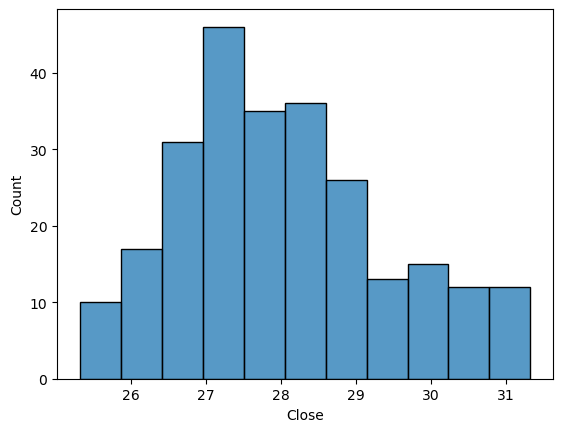

In [194]:
#Analisando a distribuição
sns.histplot(df_santander['Close'])

### Tratamento do dataframe santander

In [196]:
#adcionando um index
df_santander = df_santander.reset_index()
df_santander.head()


,Date,Open,High,Low,Close,Volume
0,2023-11-22 00:00:00-03:00,29.219,29.588,29.087,29.314,1693400
1,2023-11-23 00:00:00-03:00,29.314,29.569,29.125,29.257,707100
2,2023-11-24 00:00:00-03:00,29.210,29.210,28.870,29.021,897100
3,2023-11-27 00:00:00-03:00,29.059,29.248,28.709,28.926,1420200
4,2023-11-28 00:00:00-03:00,28.832,29.210,28.690,28.879,1931800


In [197]:
#Sem valores nulos, formatods corretos, porem o campo data esta vindo com horário, e sera necessário ser retirado
df_santander.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                            
---  ------  --------------  -----                            
 0   Date    253 non-null    datetime64[ns, America/Sao_Paulo]
 1   Open    253 non-null    float64                          
 2   High    253 non-null    float64                          
 3   Low     253 non-null    float64                          
 4   Close   253 non-null    float64                          
 5   Volume  253 non-null    int64                            
dtypes: datetime64[ns, America/Sao_Paulo](1), float64(4), int64(1)
memory usage: 12.0 KB


In [198]:
#Removendo o timestamp da variavel date

df_santander['Date'] = df_santander['Date'].apply(
    lambda x: 
    x.date()
)

In [199]:
print(f'''Diferença entre o máximo e o mínimo
    {
    np.round(df_santander['Open'].max() - df_santander['Open'].min(), decimals=2)
    }'''
     )      

Diferença entre o máximo e o mínimo
    5.84


In [200]:
#Descobrindo a data do maximo e do minimo para open
df_santander.iloc[
[
    df_santander['Open'].idxmax(),df_santander['Open'].idxmin()
],
]




,Date,Open,High,Low,Close,Volume
198,2024-09-05,31.199,31.288,30.913,31.150,1952600
251,2024-11-21,25.360,25.380,24.960,25.320,4954000


In [201]:
#por se tratar de um ativo bem estavel, o valor de abertura e fechamento é bem próximo, portanto irei trabalhar apenas com a variavel 'Open'

df_open = df_santander.drop(
            columns=['High','Low','Close', 'Volume'],
)
df_open

,Date,Open
0,2023-11-22,29.219
1,2023-11-23,29.314
2,2023-11-24,29.210
3,2023-11-27,29.059
4,2023-11-28,28.832
...,...,...
248,2024-11-14,26.050
249,2024-11-18,25.650
250,2024-11-19,25.400
251,2024-11-21,25.360


In [258]:
#Verifiquei que o tipo da variavel date é 'Object' quando deveria ser datetime
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             253 non-null    object 
 1   Open             253 non-null    float64
 2   Acima_da_media?  253 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.1+ KB


In [264]:
df_open['Date'] = pd.to_datetime(
                    df_open['Date']
                )
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             253 non-null    datetime64[ns]
 1   Open             253 non-null    float64       
 2   Acima_da_media?  253 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.1+ KB


In [266]:
df_open.head()

,Date,Open,Acima_da_media?
0,2023-11-22,29.219,Sim
1,2023-11-23,29.314,Sim
2,2023-11-24,29.210,Sim
3,2023-11-27,29.059,Sim
4,2023-11-28,28.832,Sim


In [228]:
#Agora criar uma variavel categorica, classificar bom base na media, se maior que media = sim a, se nao, nãp

valores = []

for valor in df_open['Open']:
    if valor > df_open['Open'].mean():
        valores.append('Sim')
    else:
        valores.append('Nao')

df_open['Acima_da_media?'] = valores
df_open.head(15)
        

,Date,Open,Acima_da_media?
0,2023-11-22,29.219,Sim
1,2023-11-23,29.314,Sim
2,2023-11-24,29.210,Sim
3,2023-11-27,29.059,Sim
4,2023-11-28,28.832,Sim
5,2023-11-29,28.879,Sim
6,2023-11-30,29.021,Sim
7,2023-12-01,29.305,Sim
8,2023-12-04,28.926,Sim
9,2023-12-05,29.286,Sim


In [250]:
#Porcentagem de observações acima e abaixo da media
df_open[['Acima_da_media?']].value_counts(normalize=True) * 100

Acima_da_media?
Nao               53.755
Sim               46.245
Name: proportion, dtype: float64

In [414]:
# Hoje é dia 23/11/2024, vou fazeruma comparação com o mesmo periodo do ano passado
#Para isso eu primeiramente teria que estrair da biblioteca yfinance um dataframe maior, de 2 anos, para que eu possa pegar todos os dias de novembro de 2023

df_santander_2y = cria_dataframe('SANB11.SA','2y')
df_santander_2y = df_santander_2y.reset_index()

df_santander_2y['Date'] = df_santander_2y['Date'].apply(
    lambda x: 
    x.date()
)

df_santander_2y['Date'] = pd.to_datetime(df_santander_2y['Date'])

df_santander_2y.drop(columns=['High','Low','Close','Volume','Dividends','Stock Splits'], inplace=True)
valores_2y = []

for valor in df_santander_2y['Open']:
    if valor > df_santander_2y['Open'].mean():
        valores_2y.append('Sim')
    else:
        valores_2y.append('Nao')

df_santander_2y['Acima_da_media?'] = valores_2y

df_open_novembro = df_santander_2y[df_santander_2y['Date'].dt.month == 11]

mes = []

for data in df_open_novembro['Date']:
    if data.year == 2022:
        mes.append('Novembro de 2022')
    elif data.year == 2023:
        mes.append('Novembro de 2023')
    else:
        mes.append('Novembro de 2024')

df_open_novembro['Mes'] = mes

#Agrupando por mes e verificando a media
pd.DataFrame(
    df_open_novembro.groupby('Mes')['Open'].mean()
).sort_values(by='Open', ascending=False)

#Logo temos que a maior media foi no mes de novemtro foi em 2023

C:\Users\FilipeQueirozdeAbreu\AppData\Local\Temp\ipykernel_20908\1157543481.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open_novembro['Mes'] = mes


,Open
Mes,
Novembro de 2023,28.256
Novembro de 2024,26.351
Novembro de 2022,24.806


In [418]:
#Agora verificando os valores maximos para o mes de novembro
pd.DataFrame(df_open_novembro.groupby('Mes')['Open'].max()).sort_values(by='Open', ascending=False)

,Open
Mes,
Novembro de 2023,30.108
Novembro de 2024,27.350
Novembro de 2022,25.320


In [420]:
#Agora verificando os valores minimos para o mes de novembro
pd.DataFrame(df_open_novembro.groupby('Mes')['Open'].min()).sort_values(by='Open', ascending=False)

,Open
Mes,
Novembro de 2023,25.514
Novembro de 2024,25.360
Novembro de 2022,24.456


In [468]:
df_teste1 =  pd.DataFrame(
    {
        'A':range(0,10)
    }
)

df_teste1

,A
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [456]:
df_escala = pd.DataFrame(
    {
        'Mapa':range(1,15)
    }
)

df_escala['Cm'] = df_escala['Mapa'] * 400
df_escala['Metros'] = (df_escala['Cm'] / 100).astype('int')
df_escala['Metros'] = df_escala['Metros'].astype('str') + 'm'
df_escala['Cm'] = df_escala['Cm'].astype('str') + 'cm'
df_escala

SyntaxError: invalid syntax (3151900877.py, line 1)